In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install nltk

In [12]:
import pandas as pd, numpy as mpp
import nltk, re 
from string import punctuation

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

%ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 04E4-183E

 Directory of c:\Users\yogad\Desktop\Text-Analysis-labs

07/02/2024  10:58    <DIR>          .
07/02/2024  09:29    <DIR>          ..
07/02/2024  09:29             3,238 .gitignore
07/02/2024  10:59    <DIR>          .venv
07/02/2024  09:29    <DIR>          datasets
07/02/2024  09:29    <DIR>          lab sheet
07/02/2024  09:29            70,652 lab1.ipynb
07/02/2024  09:29            15,039 lab2.ipynb
07/02/2024  11:04             2,514 lab3.ipynb
07/02/2024  09:29    <DIR>          lecture notes
07/02/2024  09:29                15 README.md
               5 File(s)         91,458 bytes
               6 Dir(s)  390,256,087,040 bytes free


In [13]:
##Part A
nouns = {"NN", "NNS", "NNP", "NNPS", "NND", "NNPP", "NNSP"}
adjectives = {"JJ", "JJS", "JJR", "JJD", "JJSS", "JJRR"}
verbs = {"VB", "VBD", "VBG", "VBN", "VBP", "VBZ", "VBZZ", "VBDG", "VBNZ"}
adverbs = {"RB", "RBS", "RBR", "RBRS", "RBD", "RBSS", "RBRR"}

In [15]:
nouns_regex = r'(\bNN[SP]?\b)|(\bNNPS\b)'
print([re.fullmatch(nouns_regex, noun) for noun in nouns])

adjectives_regex = r'(\bJJ[RS]?\b)'
print([re.findall(adjectives_regex, adjective) for adjective in adjectives])

verbs_regex = r'(\bVB[DGNPZ]?\b)'
print([re.findall(verbs_regex, verb) for verb in verbs])

adverbs_regex = r'(\bRB[RS]?\b)'
print([re.findall(adverbs_regex, adverb) for adverb in adverbs])


[<re.Match object; span=(0, 3), match='NNS'>, None, None, <re.Match object; span=(0, 4), match='NNPS'>, None, <re.Match object; span=(0, 3), match='NNP'>, <re.Match object; span=(0, 2), match='NN'>]
[['JJS'], [], ['JJR'], [], [], ['JJ']]
[['VB'], [], [], ['VBP'], ['VBG'], [], ['VBZ'], ['VBD'], ['VBN']]
[['RBS'], [], [], ['RB'], ['RBR'], [], []]


In [17]:
##Part B

#1.
data = pd.read_csv("datasets/corpus.csv")
data.sample(3)

,Document,label
6,COVID-19 testing \r\n COVID-19 testing involve...,covid
9,"Climate change \r\n \r\n In common usage, clim...",climate
3,Treatment and management of COVID-19 \r\n The ...,covid


In [34]:
#2.
flu_all = ''.join(data.Document[data.label == 'flu'])
covid_all = ''.join(data.Document[data.label == 'covid'])
climate_all = ''.join(data.Document[data.label == 'climate'])

#output first 100
flu_all[:100], covid_all[:100], climate_all[:100]

('Rapid influsenza diagnostic test Other reasons this message may be displayed:\r\nInluenaz virus Other ',
 'COVID-19 pandemic \r\n The COVID-19 pandemic, also known as the coronavirus pandemic, is a global pand',
 'Retreat of glaciers since 1850 The retreat of glaciers since 1850 is well documented and is one of t')

In [19]:
#optional
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yogad\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\yogad\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

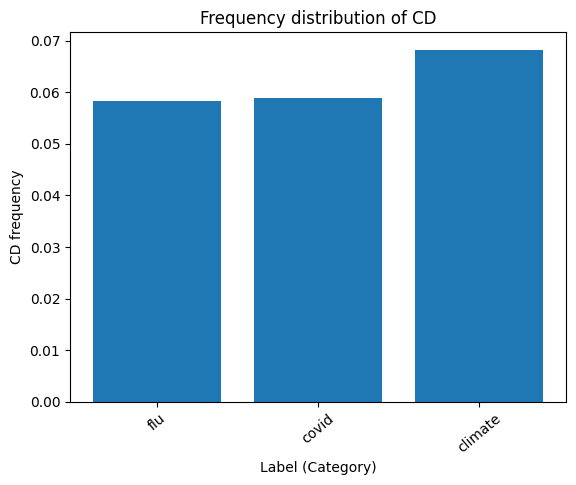

In [35]:
#3
import text_mining_utils as tmu
all_texts = [flu_all, covid_all, climate_all]

tmu.plotPOSFreq(all_texts, 'CD', ['flu', 'covid', 'climate'])

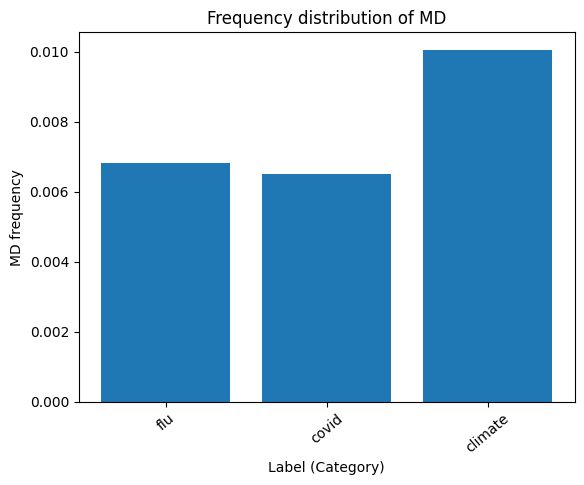

In [36]:
tmu.plotPOSFreq(all_texts, 'MD', ['flu', 'covid', 'climate'])

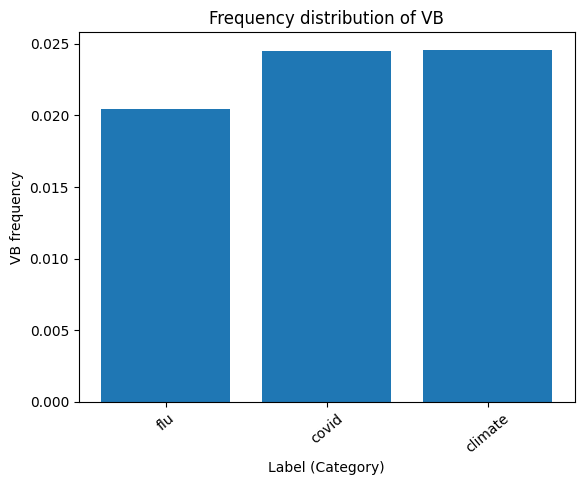

In [37]:
tmu.plotPOSFreq(all_texts, 'VB', ['flu', 'covid', 'climate'])

In [38]:
##Part C
# 1. a)

count_matrix = tmu.build_count_matrix(data.Document)
count_matrix.head()

,"""",#,$,%,&,',(,),+,",",...,β,μmol,τ,‐,‑,–,—,⁄,−,≈
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,16,0,1,86,85,0,273,...,0,0,0,0,0,7,3,0,0,0
2,44,0,0,20,0,1,49,49,1,327,...,0,0,0,0,4,2,1,0,0,5
3,4,0,0,8,0,3,19,19,0,165,...,1,0,0,1,0,0,0,0,0,0
4,2,0,0,19,0,1,36,36,2,153,...,0,0,0,0,0,21,0,2,0,0


In [39]:
#1 b, c)
count_matrix.shape

(15, 6813)

In [40]:
#2 a, b c)
y= data.label
dt_clf = DecisionTreeClassifier(random_state=1)
tmu.printClassifReport(dt_clf, count_matrix, y)

              precision    recall  f1-score   support

     climate       0.50      0.20      0.29         5
       covid       0.43      0.60      0.50         5
         flu       0.67      0.80      0.73         5

    accuracy                           0.53        15
   macro avg       0.53      0.53      0.50        15
weighted avg       0.53      0.53      0.50        15



In [41]:
#3.
knn_clf = KNeighborsClassifier()
tmu.printClassifReport(knn_clf, count_matrix, y)

              precision    recall  f1-score   support

     climate       1.00      0.40      0.57         5
       covid       0.62      1.00      0.77         5
         flu       1.00      1.00      1.00         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.78        15
weighted avg       0.88      0.80      0.78        15



In [43]:
#3.
svm_clf = SVC(random_state=1)
tmu.printClassifReport(svm_clf, count_matrix, y)


              precision    recall  f1-score   support

     climate       1.00      0.80      0.89         5
       covid       0.71      1.00      0.83         5
         flu       1.00      0.80      0.89         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.87        15
weighted avg       0.90      0.87      0.87        15

